# CASE STUDY: DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR INSURANCE CLAIMS DATA

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing Datasets

claims_data = pd.read_csv('C:/Users/Ayush/Desktop/Analytix Lab/DSPython/Python Assignment and Case studies/5/5. Pandas Case Study 3 - Insurance Claims Case Study/claims.csv')
cust_data = pd.read_csv('C:/Users/Ayush/Desktop/Analytix Lab/DSPython/Python Assignment and Case studies/5/5. Pandas Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

In [3]:
display(claims_data.head())
claims_data.info()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
claim_id               1100 non-null int64
customer_id            1100 non-null int64
incident_cause         1100 non-null object
claim_date             1100 non-null object
claim_area             1100 non-null object
police_report          1100 non-null object
claim_type             1100 non-null object
claim_amount           1035 non-null object
total_policy_claims    1090 non-null float64
fraudulent             1100 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 86.0+ KB


In [4]:
display(cust_data.head())
cust_data.info()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
CUST_ID        1085 non-null int64
gender         1085 non-null object
DateOfBirth    1085 non-null object
State          1085 non-null object
Contact        1085 non-null object
Segment        1085 non-null object
dtypes: int64(1), object(5)
memory usage: 50.9+ KB


In [5]:
# Merging DataSets

claim_cust = pd.merge(left = claims_data, 
                      right = cust_data,
                     left_on = claims_data.customer_id,
                     right_on = cust_data.CUST_ID,
                     how = 'inner')

display(claim_cust.head())
claim_cust.info()

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,30308357,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,47830476,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 17 columns):
key_0                  1085 non-null int64
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
CUST_ID                1085 non-null int64
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
dtypes: float64(1), int64(4), object(12)
memory usage: 152.6+ KB


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [6]:
data = claim_cust
data.head()

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,30308357,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,47830476,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


In [7]:
print(data.dtypes)
print('\nCOMMENTS: 1) As key_0 ,claim_id, customer_id, CUST_ID represents unique claim and customers they need to be treated as object','\n2) claim_date needs to converted to DateTime.',
      '\n3) claim_amount needs to be converted to numeric which is asked in Ques 3.',
       '\n4) DateOfBirth needs to converted to DateTime.')

key_0                    int64
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

COMMENTS: 1) As key_0 ,claim_id, customer_id, CUST_ID represents unique claim and customers they need to be treated as object 
2) claim_date needs to converted to DateTime. 
3) claim_amount needs to be converted to numeric which is asked in Ques 3. 
4) DateOfBirth needs to converted to DateTime.


In [8]:
# Correcting Data types of certain columns
data['key_0'] = data['key_0'].astype(str)
data['claim_id'] = data['claim_id'].astype(str)
data['customer_id'] = data['customer_id'].astype(str)
data['CUST_ID'] = data['CUST_ID'].astype(str)
data['claim_date'] = pd.to_datetime(data['claim_date'])
data['DateOfBirth'] = pd.to_datetime(data['DateOfBirth'])

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [9]:
data['claim_amount'] = data.claim_amount.str.replace('$','').astype(np.number)
display(data.head())
data.dtypes

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum
1,75740424,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver
2,30308357,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver
3,30308357,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver
4,47830476,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver


key_0                          object
claim_id                       object
customer_id                    object
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
CUST_ID                        object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

In [10]:
# DATA AUDIT
print(data.describe())
print('\n',data.describe(include=np.object))

       claim_amount  total_policy_claims
count   1020.000000          1075.000000
mean   12467.681373             1.586977
std    13783.249662             1.146859
min     1000.000000             1.000000
25%     1870.000000             1.000000
50%     2740.000000             1.000000
75%    24260.000000             2.000000
max    48150.500000             8.000000

            key_0  claim_id customer_id incident_cause claim_area  \
count       1085      1085        1085           1085       1085   
unique      1078      1085        1078              5          2   
top     85357756  64209730    85357756   Other causes       Auto   
freq           2         1           2            285        970   

       police_report     claim_type fraudulent   CUST_ID gender State  \
count           1085           1085       1085      1085   1085  1085   
unique             3              3          2      1078      2    50   
top               No  Material only         No  85357756   Male    NY

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [11]:
data['flag'] = np.where(data.police_report == 'Unknown','0','1')
data.head()

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag
0,21868593,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,1
1,75740424,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0
2,30308357,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,1
3,30308357,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,1
4,47830476,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column. 

In [12]:
data.drop_duplicates('customer_id',keep = 'last',inplace=True)
data

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag
0,21868593,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,1
1,75740424,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0
3,30308357,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,1
5,47830476,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
7,19269962,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,1
9,21831191,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold,0
10,18401412,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412,Male,1999-03-02,AR,752-398-2914,Gold,1
11,73486606,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606,Male,1999-10-25,AK,256-968-9172,Silver,1
12,32813689,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689,Male,1993-10-12,ID,142-324-7481,Silver,0
13,33507197,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,33507197,Female,2066-09-09,RI,165-519-4583,Gold,1


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [13]:
print(data.isnull().sum())
print('\nSince claim_amount and total_policy_claims has missing values we will impute them.  ')

key_0                   0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
flag                    0
dtype: int64

Since claim_amount and total_policy_claims has missing values we will impute them.  


In [14]:
# For Continous Variable
data['claim_amount'].fillna(data['claim_amount'].mean(),inplace=True)
data

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag
0,21868593,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,1
1,75740424,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000000,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0
3,30308357,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.000000,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,1
5,47830476,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.000000,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
7,19269962,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.000000,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,1
9,21831191,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.000000,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold,0
10,18401412,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.000000,4.0,No,18401412,Male,1999-03-02,AR,752-398-2914,Gold,1
11,73486606,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.000000,3.0,No,73486606,Male,1999-10-25,AK,256-968-9172,Silver,1
12,32813689,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.000000,1.0,No,32813689,Male,1993-10-12,ID,142-324-7481,Silver,0
13,33507197,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.500000,2.0,Yes,33507197,Female,2066-09-09,RI,165-519-4583,Gold,1


In [15]:
# For categorical Variable
data['total_policy_claims'].fillna(data.total_policy_claims.mode()[0],inplace=True)
data

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag
0,21868593,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,1
1,75740424,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000000,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,0
3,30308357,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.000000,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,1
5,47830476,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.000000,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
7,19269962,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.000000,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,1
9,21831191,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.000000,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold,0
10,18401412,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.000000,4.0,No,18401412,Male,1999-03-02,AR,752-398-2914,Gold,1
11,73486606,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.000000,3.0,No,73486606,Male,1999-10-25,AK,256-968-9172,Silver,1
12,32813689,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.000000,1.0,No,32813689,Male,1993-10-12,ID,142-324-7481,Silver,0
13,33507197,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.500000,2.0,Yes,33507197,Female,2066-09-09,RI,165-519-4583,Gold,1


In [16]:
data.isnull().sum()

key_0                  0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
flag                   0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60

In [17]:
# Correcting DateOfBirth Year
data['DateOfBirth'] = np.where(data.DateOfBirth.dt.year > pd.datetime.today().year,
                               (data.DateOfBirth)-pd.to_timedelta(100,unit = 'Y'),
                               data.DateOfBirth)
data

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag
0,21868593,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.0,No,21868593,Female,1979-01-12 00:00:00,VT,789-916-8172,Platinum,1
1,75740424,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000000,3.0,No,75740424,Female,1970-01-13 00:00:00,ME,265-543-1264,Silver,0
3,30308357,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.000000,6.0,No,30308357,Female,1984-03-11 00:00:00,TN,798-631-4758,Silver,1
5,47830476,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.000000,1.0,No,47830476,Female,1986-05-01 00:00:00,MA,413-187-7945,Silver,0
7,19269962,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.000000,2.0,No,19269962,Male,1977-05-13 00:00:00,NV,956-871-8691,Gold,1
9,21831191,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.000000,1.0,No,21831191,Male,1977-05-17 00:00:00,NH,419-712-8513,Gold,0
10,18401412,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.000000,4.0,No,18401412,Male,1999-03-02 00:00:00,AR,752-398-2914,Gold,1
11,73486606,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.000000,3.0,No,73486606,Male,1999-10-25 00:00:00,AK,256-968-9172,Silver,1
12,32813689,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.000000,1.0,No,32813689,Male,1993-10-12 00:00:00,ID,142-324-7481,Silver,0
13,33507197,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.500000,2.0,Yes,33507197,Female,1966-09-09 18:00:00,RI,165-519-4583,Gold,1


In [18]:
# Assigning column age
data['age'] = pd.datetime.today().year-data.DateOfBirth.dt.year
data

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age
0,21868593,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.0,No,21868593,Female,1979-01-12 00:00:00,VT,789-916-8172,Platinum,1,41
1,75740424,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000000,3.0,No,75740424,Female,1970-01-13 00:00:00,ME,265-543-1264,Silver,0,50
3,30308357,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.000000,6.0,No,30308357,Female,1984-03-11 00:00:00,TN,798-631-4758,Silver,1,36
5,47830476,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.000000,1.0,No,47830476,Female,1986-05-01 00:00:00,MA,413-187-7945,Silver,0,34
7,19269962,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.000000,2.0,No,19269962,Male,1977-05-13 00:00:00,NV,956-871-8691,Gold,1,43
9,21831191,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.000000,1.0,No,21831191,Male,1977-05-17 00:00:00,NH,419-712-8513,Gold,0,43
10,18401412,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.000000,4.0,No,18401412,Male,1999-03-02 00:00:00,AR,752-398-2914,Gold,1,21
11,73486606,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.000000,3.0,No,73486606,Male,1999-10-25 00:00:00,AK,256-968-9172,Silver,1,21
12,32813689,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.000000,1.0,No,32813689,Male,1993-10-12 00:00:00,ID,142-324-7481,Silver,0,27
13,33507197,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.500000,2.0,Yes,33507197,Female,1966-09-09 18:00:00,RI,165-519-4583,Gold,1,54


In [19]:
# Children < 18
# Youth 18-30
# Adult 30-60
# Senior > 60

data['AgeGroup'] = np.where(data.age<18,'Children',
                            (np.where((data.age>=18) & (data.age<=30),'Youth',
                            (np.where((data.age>30) & (data.age<=60),'Adult','Senior')))))
data


,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age,AgeGroup
0,21868593,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.0,No,21868593,Female,1979-01-12 00:00:00,VT,789-916-8172,Platinum,1,41,Adult
1,75740424,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.000000,3.0,No,75740424,Female,1970-01-13 00:00:00,ME,265-543-1264,Silver,0,50,Adult
3,30308357,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.000000,6.0,No,30308357,Female,1984-03-11 00:00:00,TN,798-631-4758,Silver,1,36,Adult
5,47830476,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.000000,1.0,No,47830476,Female,1986-05-01 00:00:00,MA,413-187-7945,Silver,0,34,Adult
7,19269962,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.000000,2.0,No,19269962,Male,1977-05-13 00:00:00,NV,956-871-8691,Gold,1,43,Adult
9,21831191,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.000000,1.0,No,21831191,Male,1977-05-17 00:00:00,NH,419-712-8513,Gold,0,43,Adult
10,18401412,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.000000,4.0,No,18401412,Male,1999-03-02 00:00:00,AR,752-398-2914,Gold,1,21,Youth
11,73486606,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.000000,3.0,No,73486606,Male,1999-10-25 00:00:00,AK,256-968-9172,Silver,1,21,Youth
12,32813689,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.000000,1.0,No,32813689,Male,1993-10-12 00:00:00,ID,142-324-7481,Silver,0,27,Youth
13,33507197,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.500000,2.0,Yes,33507197,Female,1966-09-09 18:00:00,RI,165-519-4583,Gold,1,54,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [20]:
q8 = data.groupby('Segment').claim_amount.mean().reset_index()
q8

,Segment,claim_amount
0,Gold,12846.386178
1,Platinum,12371.644999
2,Silver,12267.146560


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [21]:
from datetime import datetime, timedelta
prior = data[pd.datetime(2018,10,1) - data.claim_date >= timedelta(20)]
prior.groupby('incident_cause').claim_amount.sum().reset_index()

,incident_cause,claim_amount
0,Crime,7.219374e+05
1,Driver error,3.315848e+06
2,Natural causes,1.312745e+06
3,Other causes,3.723147e+06
4,Other driver error,3.277533e+06


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [22]:
count = data.loc[((data.State == 'TX') | (data.State == 'DE') | (data.State == 'AK')) & ((data.incident_cause == 'Driver error')|(data.incident_cause == 'Other driver error')) & (data.AgeGroup == 'Adult'),['claim_amount']].count()
print(count[0],'adults from TX, DE and AK claimed insurance for driver related issues and causes')

29 adults from TX, DE and AK claimed insurance for driver related issues and causes


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

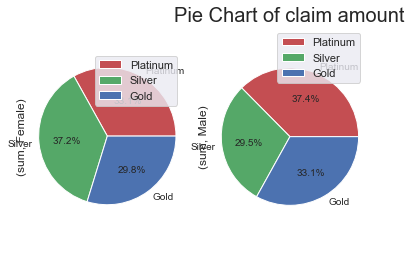

In [23]:
sns.set()
claim = pd.pivot_table(data, index =['Segment'],columns ='gender',values ='claim_amount',aggfunc=[np.sum])


claim.plot(kind='pie', 
            labels=['Platinum','Silver','Gold'],
            colors=['r', 'g', 'b'],
            autopct='%.1f%%', # to get percentage and round off appropriately
            fontsize=10,
            subplots=True)

plt.title('Pie Chart of claim amount',fontsize=20)

plt.axis('equal')
plt.show()

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [24]:
q12 = data.loc[((data.incident_cause == 'Driver error')|(data.incident_cause == 'Other driver error'))]
q12

,key_0,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,age,AgeGroup
0,21868593,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.000000,1.0,No,21868593,Female,1979-01-12 00:00:00,VT,789-916-8172,Platinum,1,41,Adult
3,30308357,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.000000,6.0,No,30308357,Female,1984-03-11 00:00:00,TN,798-631-4758,Silver,1,36,Adult
9,21831191,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.000000,1.0,No,21831191,Male,1977-05-17 00:00:00,NH,419-712-8513,Gold,0,43,Adult
10,18401412,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.000000,4.0,No,18401412,Male,1999-03-02 00:00:00,AR,752-398-2914,Gold,1,21,Youth
14,99103685,74165873,99103685,Other driver error,2018-01-13,Home,No,Material only,1495.000000,1.0,Yes,99103685,Female,1985-12-30 00:00:00,KY,764-439-9856,Gold,1,35,Adult
15,51583214,28564401,51583214,Other driver error,2017-12-10,Auto,Unknown,Material and injury,16690.000000,1.0,No,51583214,Male,1999-10-31 00:00:00,NH,743-486-5264,Platinum,0,21,Youth
16,35875366,72738047,35875366,Other driver error,2018-04-24,Auto,Unknown,Material only,1870.000000,1.0,No,35875366,Male,1990-09-16 00:00:00,MD,954-964-1746,Platinum,0,30,Youth
17,21240703,53780662,21240703,Other driver error,2018-09-19,Auto,Unknown,Material only,1050.000000,1.0,No,21240703,Male,1963-07-22 18:00:00,MD,473-561-2675,Silver,0,57,Adult
18,18288638,67257404,18288638,Other driver error,2018-04-24,Auto,Yes,Injury only,32560.000000,1.0,No,18288638,Female,1969-01-14 18:00:00,MI,314-135-1359,Platinum,1,51,Adult
20,1407979,12548447,1407979,Driver error,2018-06-03,Auto,Unknown,Material only,3208.500000,1.0,Yes,1407979,Male,1987-03-15 00:00:00,RI,165-217-1648,Silver,0,33,Adult


In [25]:
q12_ = pd.pivot_table(q12,columns=['gender'],values ='claim_amount',aggfunc=[np.sum])
q12_

sum              
gender              Female          Male
claim_amount  3.136715e+06  3.975408e+06

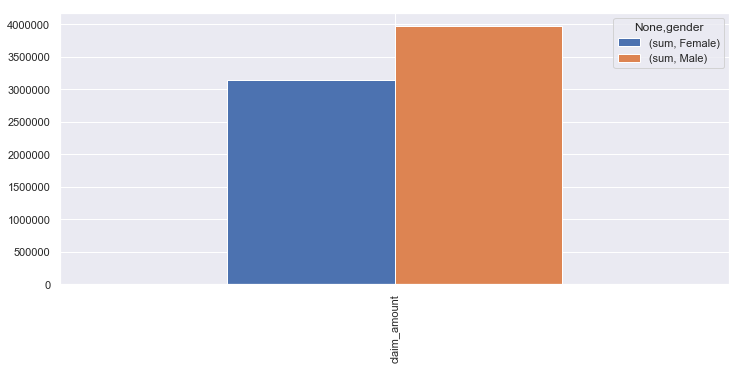


 Among males and females, Males had claimed the most for any type of driver related issues


In [26]:
q12_.plot(kind='bar', stacked=False, figsize=(12, 5))
plt.show()
print('\n Among males and females, Males had claimed the most for any type of driver related issues')

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [27]:
q13 = data[data['fraudulent']=='Yes'].groupby('AgeGroup').total_policy_claims.sum()
q13

AgeGroup
Adult    313.0
Youth    112.0
Name: total_policy_claims, dtype: float64

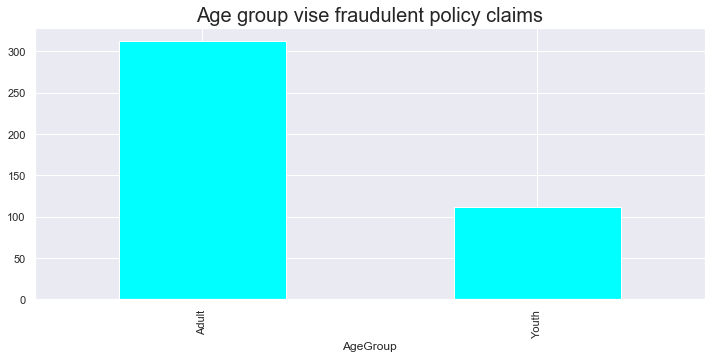


Adult had the maximum fraudulent policy claims.


In [28]:
q13.plot(kind='bar', stacked=False, figsize=(12, 5),color='cyan')
plt.title('Age group vise fraudulent policy claims',fontsize=20)
plt.show()
print('\nAdult had the maximum fraudulent policy claims.')

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [29]:
q14 = data.groupby([data.claim_date.dt.month]).claim_amount.sum().reset_index().rename(columns={'claim_date':'Month'})
date = pd.to_datetime(q14.Month,format='%m')
date_index = pd.DatetimeIndex(date.values)
q14 = q14.set_index(date_index.strftime('%B')).drop(columns = 'Month')
q14

,claim_amount
January,1.327169e+06
February,1.164541e+06
March,1.320249e+06
April,1.293953e+06
May,1.114459e+06
June,1.277349e+06
July,1.379314e+06
August,9.112965e+05
September,9.831979e+05
October,1.409637e+06


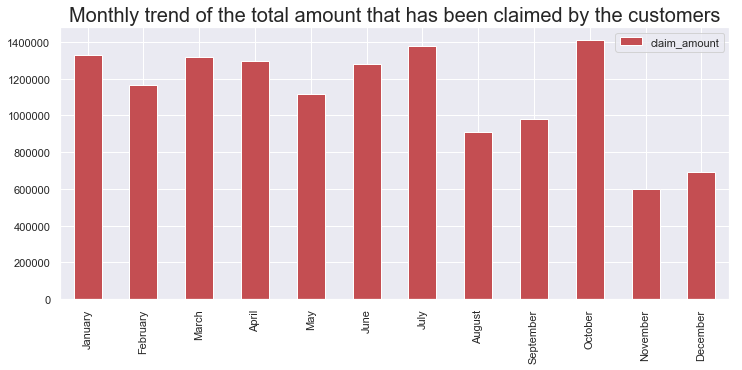

In [30]:
q14.plot(kind='bar', stacked=False, figsize=(12, 5),color='r')
plt.title('Monthly trend of the total amount that has been claimed by the customers',fontsize=20)
plt.show()

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [31]:
fraud = data[data['fraudulent']=='Yes']
nfraud = data[data['fraudulent']=='No']

In [32]:
f = fraud.pivot_table(index ='fraudulent',columns=['gender'],values ='claim_amount',aggfunc=[np.mean])
nf = nfraud.pivot_table(index ='fraudulent',columns=['gender'],values ='claim_amount',aggfunc=[np.mean])
f1 = fraud.pivot_table(index ='fraudulent',columns=['AgeGroup'],values ='claim_amount',aggfunc=[np.mean])
nf1 = nfraud.pivot_table(index ='fraudulent',columns=['AgeGroup'],values ='claim_amount',aggfunc=[np.mean])

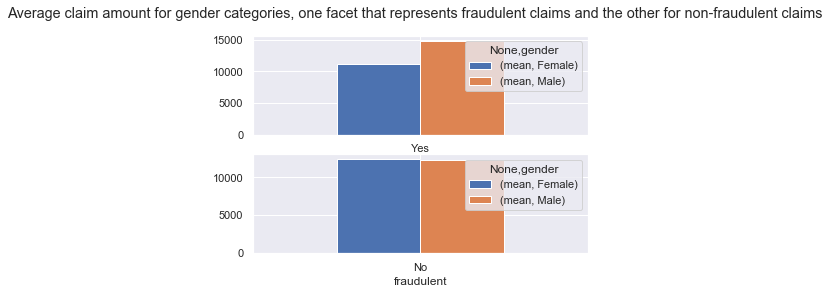

In [33]:
fig, ax = plt.subplots(2)
f.plot(kind='bar', rot=0, ax=ax[0])
nf.plot(kind='bar', rot=0, ax=ax[1])
plt.suptitle('Average claim amount for gender categories, one facet that represents fraudulent claims and the other for non-fraudulent claims')
plt.show()

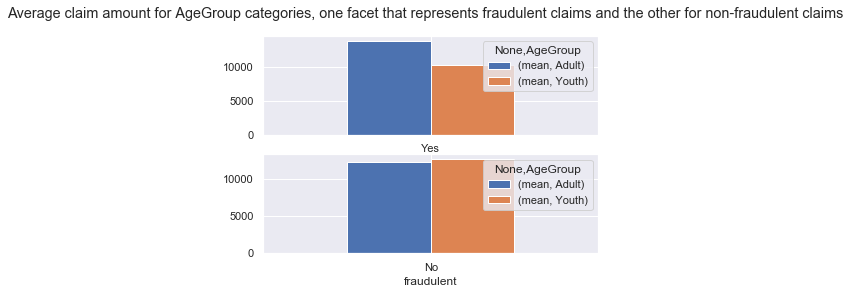

In [34]:
fig, ax = plt.subplots(2)
f1.plot(kind='bar', rot=0, ax=ax[0])
nf1.plot(kind='bar', rot=0, ax=ax[1])
plt.suptitle('Average claim amount for AgeGroup categories, one facet that represents fraudulent claims and the other for non-fraudulent claims')
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.
### 16. Is there any similarity in the amount claimed by males and females?
### We will do 2 Sample T-Test here

H0 : Mean amount claimed by Males = Mean amount claimed by Females

H1 : Mean amount claimed by Males != Mean amount claimed by Females

In [35]:
import scipy.stats as stats
mmean = data[data['gender']=='Male'].claim_amount
fmean = data[data['gender']=='Female'].claim_amount
print('Mean amount claimed by Males is',np.mean(mmean),
     '\nMean amount claimed by Females is',np.mean(fmean),
        '\nThe Difference of two means is', np.mean(mmean)-np.mean(fmean))

Mean amount claimed by Males is 12884.829631308425 
Mean amount claimed by Females is 12100.692029236623 
The Difference of two means is 784.1376020718017


In [36]:
print('Standard deviation for claimed amount by Males',np.var(mmean),
      '\nStandard deviation for claimed amount by Females',np.var(fmean),
     '\n',np.var(mmean)==np.var(fmean))

Standard deviation for claimed amount by Males 183698588.75855923 
Standard deviation for claimed amount by Females 172546242.23765618 
 False


In [37]:
q16 = stats.ttest_ind(a=mmean,b=fmean,equal_var=False)
q16

Ttest_indResult(statistic=0.9637241707490979, pvalue=0.33540080346197265)

In [38]:
print(q16.pvalue<0.05)
'''CONCLUSION: Since the p value of the test is greater than 5%, we can safely conclude that there is a similarity between amount claimed by males and females'''

False


'CONCLUSION: Since the p value of the test is greater than 5%, we can safely conclude that there is a similarity between amount claimed by males and females'

### 17. Is there any relationship between age category and segment?
### We will perform Chi-Square Test here as age category and segment both are categorical variable.
H0 : Observed = Expected (No relation between age category and segment)

H1 : Observed != Expected (There is a realtionship between age category and segment)

In [39]:
ctab = pd.crosstab(data.AgeGroup,data.Segment,margins=True)
ctab

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,283,260,258,801
Youth,88,101,88,277
All,371,361,346,1078


In [40]:
chi2 = stats.chi2_contingency(observed=ctab)
chi2

(1.7559082572247031,
 0.9407239643787965,
 6,
 array([[ 275.66883117,  268.23840445,  257.09276438,  801.        ],
        [  95.33116883,   92.76159555,   88.90723562,  277.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [41]:
print('Chi-Square statistics is',chi2[0],'and p-value is',chi2[1])
print(chi2[1]<0.05)
'''CONCLUSION : Since the p value of the test is greter than 5%, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment'''

Chi-Square statistics is 1.7559082572247031 and p-value is 0.9407239643787965
False


'CONCLUSION : Since the p value of the test is greter than 5%, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment'

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

### We will perform 1 sample T-Test here.
#### H0 : Claim amounts = 10000 
#### H1 : Claim amounts > 10000

In [42]:
q18 = stats.ttest_1samp(a = data.claim_amount,popmean=10000)
q18

Ttest_1sampResult(statistic=6.146231134929638, pvalue=1.1156022878717526e-09)

In [43]:
print(q18.pvalue<0.05)
'''CONCLUSION: Since the pvalue of the test is less than 5%, we reject the null hypothesis (H0). Therefore current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.'''

True


'CONCLUSION: Since the pvalue of the test is less than 5%, we reject the null hypothesis (H0). Therefore current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.'

### 19. Is there any difference between age groups and insurance claims?

In [44]:
print(data.AgeGroup.unique())
print('Since AgeGroup have two Categories Adult and Youth')


['Adult' 'Youth']
Since AgeGroup have two Categories Adult and Youth


### We will do 2 Sample T-Test here

H0 : Mean insurance claims by Adult = Mean insurance claims by Youth

H1 : Mean insurance claims by Adult != Mean insurance claims by Youth

In [45]:
adult = data[data['AgeGroup'] == 'Adult'].total_policy_claims
youth = data[data['AgeGroup'] == 'Youth'].total_policy_claims
print('Mean insurance claims by Adult is',np.mean(adult),
     '\nMean insurance claims by Youth is',np.mean(youth),
        '\nThe Difference of two means is', np.mean(adult)-np.mean(youth))

Mean insurance claims by Adult is 1.5593008739076155 
Mean insurance claims by Youth is 1.6534296028880866 
The Difference of two means is -0.09412872898047109


In [46]:
print('Standard deviation for insurance claims by Adult is',np.var(adult),
      '\nStandard deviation for insurance claims by Youth is',np.var(youth),
     '\n',np.var(adult)==np.var(youth))

Standard deviation for insurance claims by Adult is 1.175322357664658 
Standard deviation for insurance claims by Youth is 1.6921633280767348 
 False


In [47]:
q19 = stats.ttest_ind(a= adult,b=youth,equal_var=False)
q19

Ttest_indResult(statistic=-1.079717821464259, pvalue=0.2808936248284259)

In [48]:
print(q19.pvalue<0.05)
'''CONCLUSION: Since the P value of the test is greater than 5%, we fail to reject the H0. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims.'''

False


'CONCLUSION: Since the P value of the test is greater than 5%, we fail to reject the H0. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims.'

### 20. Is there any relationship between total number of policy claims and the claimed amount?

### We will use Pearson’s Correlation here.

H0 : No relation between total number of policy claims and the claimed amount

H1 : There is a relation between total number of policy claims and the claimed amount

In [49]:
pclaims = data.total_policy_claims
camount = data.claim_amount

In [50]:
q20 = stats.pearsonr(pclaims,camount)
q20

(-0.022392720732099913, 0.46267007422732986)

In [51]:
print('Measure of Correlation value is', q20[0],'\nP value of the test is',q20[1])
'''CONCLUSION: Since Measure of Correlation value is -0.0223 which is negative, hence we conclude that total number of policy claims is inversely proportional to the claimed amount, i.e. as total number of policy claims increases claimed amount decreases and vice versa.'''

Measure of Correlation value is -0.022392720732099913 
P value of the test is 0.46267007422732986


'CONCLUSION: Since Measure of Correlation value is -0.0223 which is negative, hence we conclude that total number of policy claims is inversely proportional to the claimed amount, i.e. as total number of policy claims increases claimed amount decreases and vice versa.'

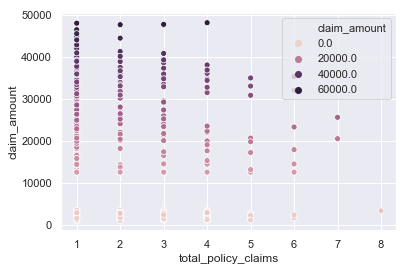

In [52]:
sns.scatterplot(x=pclaims,y=camount,hue = camount)